In [22]:
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import cross_validate,GridSearchCV,train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.metrics import f1_score

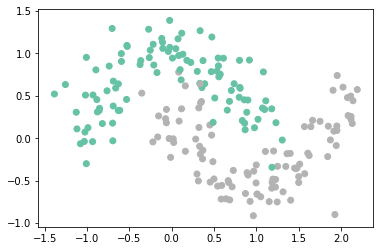

In [2]:
noise = 0.2
X, y = make_moons(200, noise=noise, random_state=2718)
X_test, y_test = make_moons(40, noise=noise,random_state=31415)
plt.scatter(*X.T, c=y, cmap="Set2");


Ejercicio


Crea un pipeline llamado model que primero transforme el espacio con un polinomio de grado 30 (sin incluir p0) y, posteriormente, considere la transformación de los datos con una regresión logística sin regularización (LogisticRegression(penalty="none"))




In [15]:
model = Pipeline([
                 ("Transform",  PolynomialFeatures(degree=30,include_bias=False)  ),
                 ("Regression", LogisticRegression( penalty="none",n_jobs=-1)) 
])

Realiza un Bagging Classifer de model llamado bagging_logreg con n_estimators=100 y random_state=314


In [10]:
bagging_logreg = BaggingClassifier(base_estimator=model,n_estimators=100, random_state=314,n_jobs=-1)

Entrena model y bagging_logreg considerando X y y definido arriba


In [16]:
model.fit(X,y)

Pipeline(memory=None,
         steps=[('Transform',
                 PolynomialFeatures(degree=30, include_bias=False,
                                    interaction_only=False, order='C')),
                ('Regression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=-1,
                                    penalty='none', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [29]:
bagging_logreg.fit(X,y)

BaggingClassifier(base_estimator=Pipeline(memory=None,
                                          steps=[('Transform',
                                                  PolynomialFeatures(degree=30,
                                                                     include_bias=False,
                                                                     interaction_only=False,
                                                                     order='C')),
                                                 ('Regression',
                                                  LogisticRegression(C=1.0,
                                                                     class_weight=None,
                                                                     dual=False,
                                                                     fit_intercept=True,
                                                                     intercept_scaling=1,
                                                  

Grafica la función de decisión dada por model y por bagging_logreg ¿Qué observas?

In [13]:
def plot_classf_model(X, y, model, ax, title=None, step=0.01, epsilon=0.1, contour=False):
    """
    Contourplot a two-class underlying model, and test datapoints.
    
    Paramters
    ---------
    X: Matrix(mxn, R)
        Matrix of feature vectors with examples
    y: n-dimensional vector 
        Actual classes for each of the 'm' provided examples.
    """
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    points_cmap = ListedColormap(["Yellow", "Blue"])
    x0, x1 = X[:,0].min() - epsilon, X[:,0].max() + epsilon
    y0, y1 = X[:,1].min() - epsilon, X[:,1].max() + epsilon
    
    xx, yy = np.mgrid[x0:x1:step, y0:y1:step]
    
    preds = model.predict(np.c_[xx.ravel(), yy.ravel()])
    preds = preds.reshape(xx.shape)
    
    if contour:
        ax.contour(xx, yy, preds)
    ax.pcolormesh(xx, yy, preds, cmap=custom_cmap)
    ax.scatter(*X.T, c=y, s=50, edgecolor="k", cmap=points_cmap)
    if title is not None:
        ax.set_title(title)

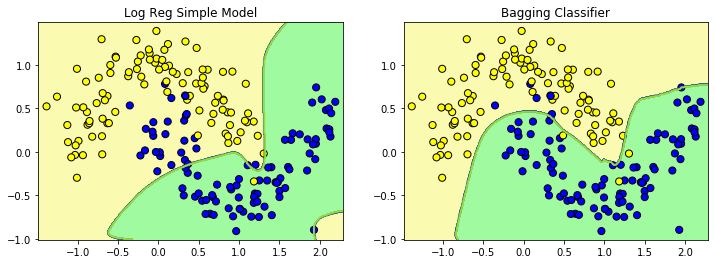

In [23]:
fig,ax=plt.subplots(1, 2, figsize=(12, 4))
plot_classf_model(X, y, model, ax=ax[0], title="Log Reg Simple Model", step=0.01, epsilon=0.1, contour=True)
plot_classf_model(X, y, bagging_logreg, ax=ax[1], title="Bagging Classifier", step=0.01, epsilon=0.1, contour=True)

A pesar de contemplar una transformacion polinomial de 30 grados, esta sensibilidad es insuficiente para emular/describir la composicion de los datos, pues despues de todo los fenomenos no suelen tener un comportamiento "funcional".
En contraste cuando utilizamos bagging podemos obtener la mejor solucion (dado el conjunto de entrenamiento) en cada zona.

Considerando un f1_score (dentro de sklearn.metrics), calcula el f1-score sobre el test set (X_test, y_test) considerando model y bagging_logreg. ¿Qué resultados arroja?

In [31]:
f1_score(y_test, model.predict(X_test))

0.8333333333333334

In [32]:
f1_score(y_test, bagging_logreg.predict(X_test))

0.9500000000000001